<H1>Small Swarm Analysis</H1>


In [2]:
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
#SMALL_SIZE = 8
#MEDIUM_SIZE = 10
#BIGGER_SIZE = 36
#Font sizes modifiers for inclusion in papers. 
#plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 120)
%matplotlib inline

In [3]:
# load all particle data from simulator
S = pd.read_csv('csv/small/exp.p.csv')

<h1>LOADED DATA</h1>

<code>IMAG</code> is equivalent to $v(b) = v_c(b) + v_r(b)$ <br>
<code>CMAG</code> is equivalent to $v_c(b) = \frac{1}{\lvert n_c(b)\rvert} \sum_{b' \in n_c(b)}\mathsf{ekc}(b, b')\, \vec{b b'}$ <br>
<code>RMAG</code> is equivalent to $v_r(b) = \frac{1}{\lvert n_r(b)\rvert}\sum_{b' \in n_r(b)} k_r\left(\lVert\vec{b b'}\rVert - \mathsf{erf}(b,b') \, \right)\widehat{bb'}$

In [11]:
#AGGREGATED SWARM DATA 
S

,STEP,ID,X,Y,PERIM,CX,CY,CMAG,RX,RY,RMAG,IX,IY,IMAG,DX,DY,DMAG
0,0,0,-2.180000,-0.200000,True,0.237000,-0.079200,0.249883,-10.997546,-4.740407,11.975704,-10.760547,-4.819608,11.790589,0.0,0.0,0.0
1,0,1,1.539999,-0.260000,True,-0.161000,-0.002500,0.161019,8.344493,1.568010,8.490537,-2.577054,-3.254098,4.150947,0.0,0.0,0.0
2,0,2,-1.440001,0.900000,True,0.153000,-0.149000,0.213565,-0.772622,10.752064,10.779787,-3.196677,7.348966,8.014114,0.0,0.0,0.0
3,0,3,0.000000,0.000000,False,-0.008000,-0.048000,0.048662,-3.264505,1.086537,3.440575,-6.469182,8.387503,10.592475,0.0,0.0,0.0
4,0,4,1.759998,-1.100000,True,-0.193200,0.091200,0.213644,9.144547,-18.489939,20.627665,2.482165,-10.011236,10.314359,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6215,621,5,-0.834753,-0.804113,False,-0.004759,-0.005207,0.007055,-0.648448,-0.222122,0.685436,1.361275,-0.835058,1.596995,0.0,0.0,0.0
6216,621,6,1.783325,2.158857,True,-0.130370,-0.143884,0.194162,-0.039380,1.573718,1.574211,1.191525,0.594777,1.331725,0.0,0.0,0.0
6217,621,7,-0.167415,2.627006,True,0.062415,-0.199722,0.209247,0.000000,0.000000,0.000000,1.253941,0.395055,1.314700,0.0,0.0,0.0
6218,621,8,-0.200624,-2.748271,True,-0.066057,0.191978,0.203024,-1.304334,-1.500009,1.987791,-0.116450,-0.912976,0.920373,0.0,0.0,0.0


<code>MAG</code> is equivalent to $v_c(b,b') = \mathsf{ekc}(b, b')\, \vec{b b'}$ <br>
<code>DIST</code> is equivalent to $\widehat{bb'}$ <br><br>
$\mathsf{ekc}(b, b') = \mathsf{if} \; \mathsf{per}(b) \; \mathsf{and} \; \mathsf{per}(b') \; \mathsf{then} \; \mathrm{p}_ck_c \; \mathsf{else} \; k_c$

<code>MAG</code> is equivalent to $v_r(b,b') = k_r\left(\lVert\vec{b b'}\rVert - \mathsf{erf}(b,b') \, \right)\widehat{bb'}$<br>
<code>DIST</code> is equivalent to $\widehat{bb'}$ <br><br>
$\mathsf{erf}(b, b') = \mathsf{if} \;
\mathsf{per}(b) \; \mathsf{and} \; \mathsf{per}(b') \; \mathsf{then} \;
p_rR_b \; \mathsf{else} \; R_b$

In [12]:
# generate a DataFrame with perimeter count per step
group = S[["STEP","PERIM"]].query("PERIM == True").groupby('STEP').count().reset_index()

<h1>PERIMETER</h1>

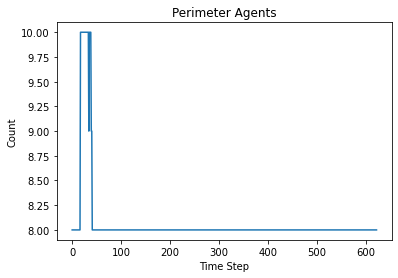

In [13]:
plt.plot(group.STEP,group.PERIM)
plt.title("Perimeter Agents")
plt.xlabel("Time Step")
plt.ylabel("Count")
plt.show()

<h1>AGGREGATED MAGNITUDE DATA</h1>

In [14]:
group1 = S[["STEP","IMAG"]].groupby('STEP').mean(0).reset_index()
group2 = S[["STEP","IMAG"]].groupby('STEP').std(0).reset_index()
group3 = S[["STEP","IMAG"]].groupby('STEP').max(0).reset_index()
group4 = S[["STEP","IMAG"]].groupby('STEP').min(0).reset_index()

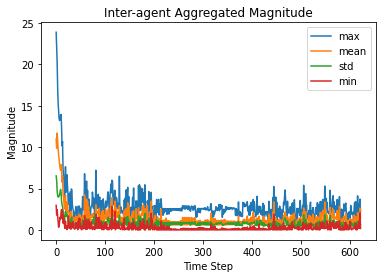

In [15]:
a = plt.plot(group3.STEP,group3.IMAG,label='max')
b = plt.plot(group1.STEP,group1.IMAG,label='mean')
c = plt.plot(group2.STEP,group2.IMAG,label='std')
d = plt.plot(group4.STEP,group4.IMAG,label='min')
plt.title("Inter-agent Aggregated Magnitude")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude")
plt.show()

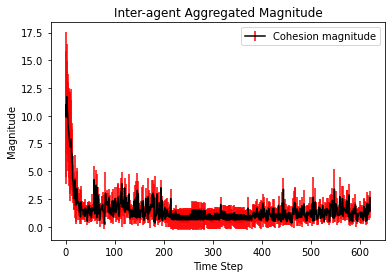

In [16]:
plt.errorbar(group1.STEP,group1.IMAG,group2.IMAG,label='Cohesion magnitude',ecolor='red',color='black')
plt.title("Inter-agent Aggregated Magnitude")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude")
plt.show()

In [49]:
state1 = S[S["STEP"]==0].reset_index()
state2 = S[S["STEP"]==100].reset_index()
state3 = S[S["STEP"]==300].reset_index()

In [50]:
agents1 = state1[["X","Y"]]
agents2 = state2[["X","Y"]]
agents3 = state3[["X","Y"]]

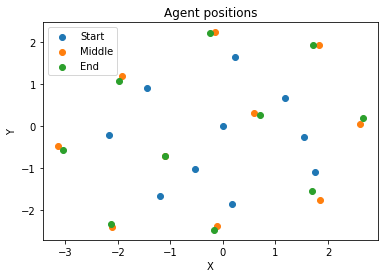

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(agents1["X"],agents1["Y"], label="Start")
ax1.scatter(agents2["X"],agents2["Y"], label="Middle")
ax1.scatter(agents3["X"],agents3["Y"], label="End")
plt.title("Agent positions")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()